In [51]:
import numpy as np


In [2]:
!pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.0 MB ? eta -:--:--
     ---------- ----------------------------- 0.8/3.0 MB 2.4 MB/s eta 0:00:01
     ---------- ----------------------------- 0.8/3.0 MB 2.4 MB/s eta 0:00:01
     ------------- -------------------------- 1.0/3.0 MB 1.2 MB/s eta 0:00:02
     ----------------- ---------------------- 1.3/3.0 MB 1.4 MB/s eta 0:00:02
     -------------------- ------------------- 1.6/3.0 MB 1.3 MB/s eta 0:00:02
     ------------------------ --------------- 1.8/3.0 MB 1.4 MB/s eta 0:00:01
     --------------------------- ------------ 2.1/3.0 MB 1.4 MB/s eta 0:00:01
     ---------------------------------- ----- 2.6/3.0 MB 1.4 MB/s eta 0:00:01
     -------------------------------------- - 2.9/3.0 MB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 1.3 MB/s eta 0:00:00


In [52]:
import yfinance as yf

In [53]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [54]:
stock = "GOOG"
google_data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [55]:
google_data.head(5)

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-02-28,4.665436,4.712093,4.612327,4.616050,313908211
2005-03-01,4.617538,4.709115,4.516780,4.697700,373844027
2005-03-02,4.595699,4.657495,4.575349,4.614809,292512314
2005-03-03,4.641115,4.659479,4.574109,4.619276,305484756
2005-03-04,4.613568,4.647072,4.592970,4.633422,271979640


In [56]:
google_data.shape

(5033, 5)

In [57]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,49.971237,50.478553,49.451896,49.952003,1.050080e+08
std,47.937219,48.442160,47.436672,47.912534,1.350091e+08
min,4.342810,4.427437,4.282752,4.350503,1.584340e+05
25%,13.441887,13.576398,13.309363,13.475888,2.627594e+07
50%,28.501062,28.713216,28.217714,28.538821,4.913654e+07
75%,67.200546,67.756040,66.710298,67.258330,1.291422e+08
max,207.710007,208.699997,204.259995,204.500000,1.650833e+09


In [58]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5033 entries, 2005-02-28 to 2025-02-27
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5033 non-null   float64
 1   (High, GOOG)    5033 non-null   float64
 2   (Low, GOOG)     5033 non-null   float64
 3   (Open, GOOG)    5033 non-null   float64
 4   (Volume, GOOG)  5033 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.9 KB


In [59]:
import matplotlib.pyplot as plt

In [60]:
def  plot_graph(figsize, values, col_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel('Years')
    plt.ylabel(col_name)
    plt.title(f"{col_name} of Google Data")


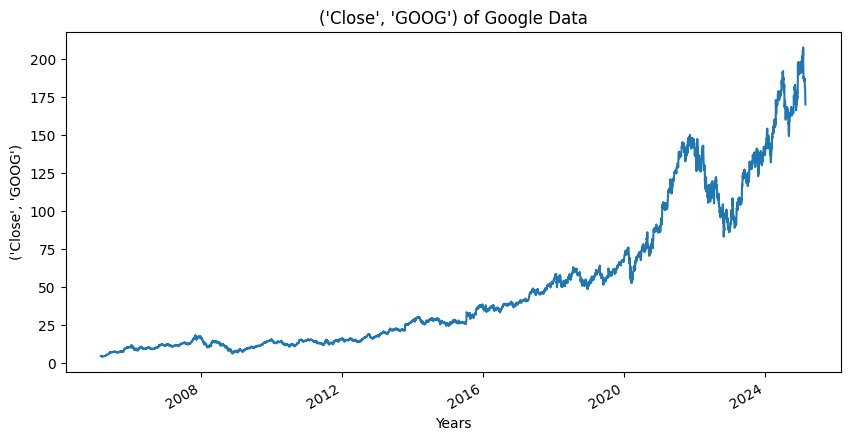

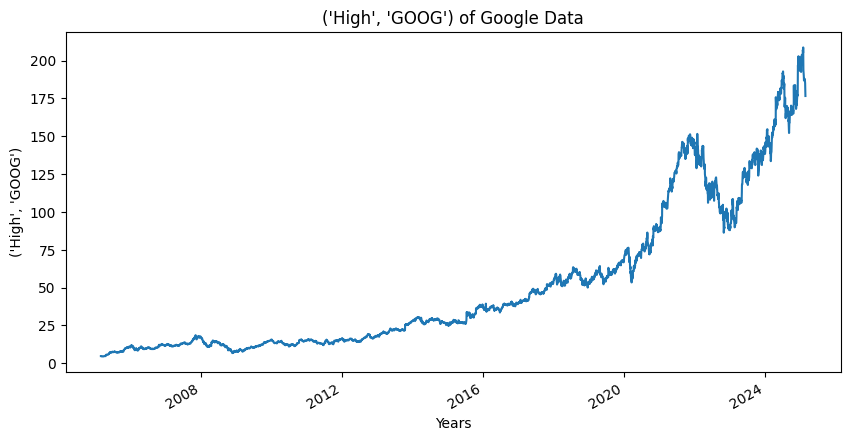

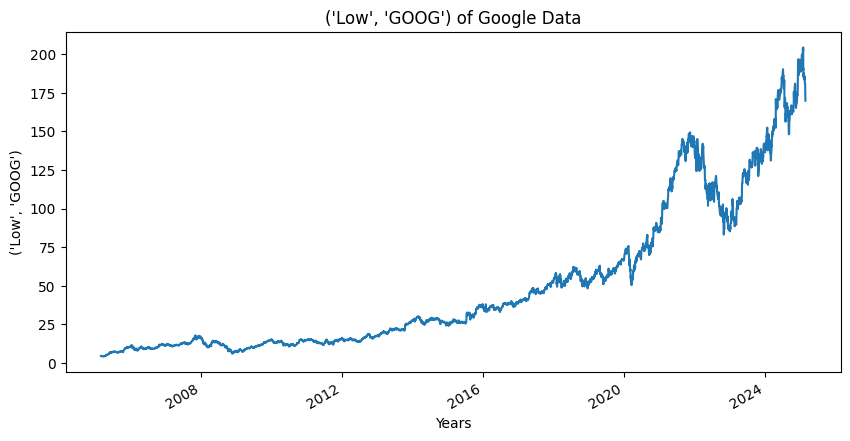

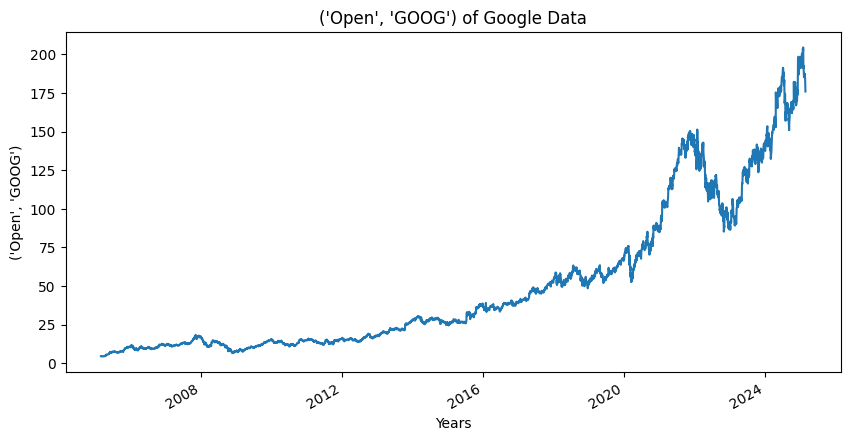

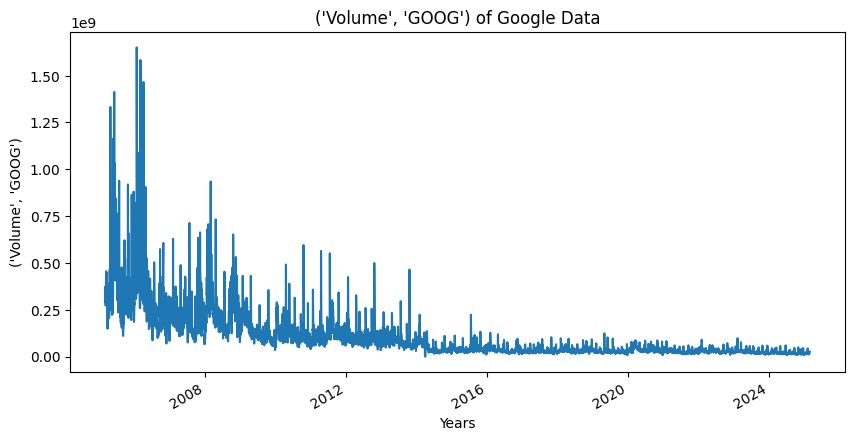

In [61]:
for column in google_data.columns:
    plot_graph((10,5),google_data[column], column)

In [62]:
temp_data = [10,20,30,40,50,60,70,80,90,100]
print(sum(temp_data[1:6])/5)

40.0


In [63]:
import pandas as pd


Moving Average

In [64]:
data = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [65]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [66]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 214
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 252


In [67]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()

In [68]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-02-16         NaN
2006-02-17         NaN
2006-02-21         NaN
2006-02-22         NaN
2006-02-23    7.686959
Name: MA_for_250_days, dtype: float64

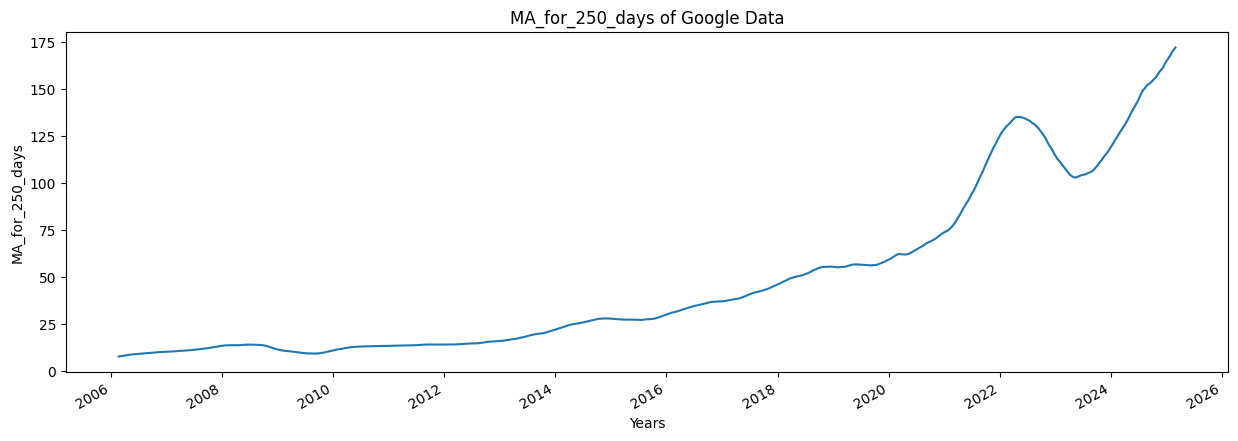

In [69]:
plot_graph((15,5), google_data['MA_for_250_days'],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

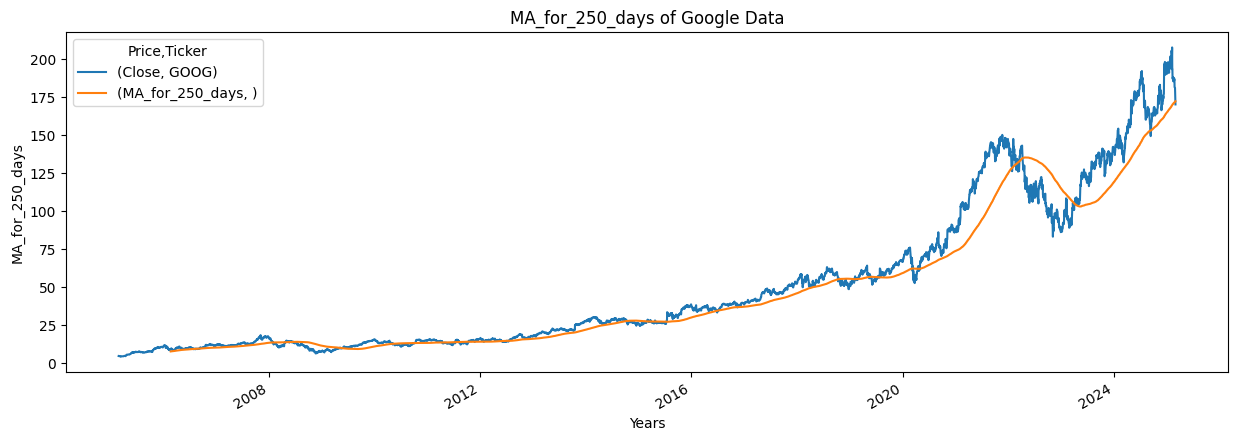

In [70]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']],'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

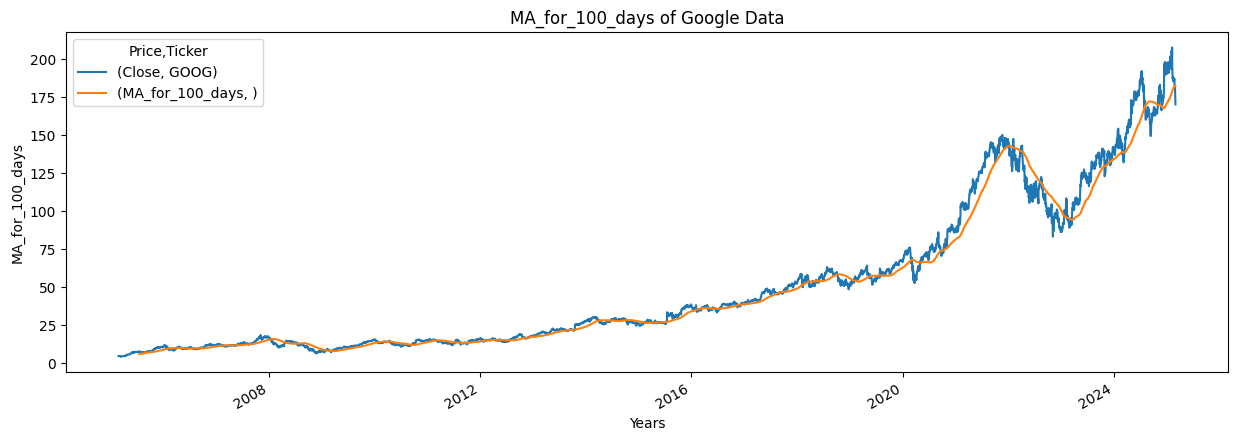

In [71]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']],'MA_for_100_days')


<Figure size 640x480 with 0 Axes>

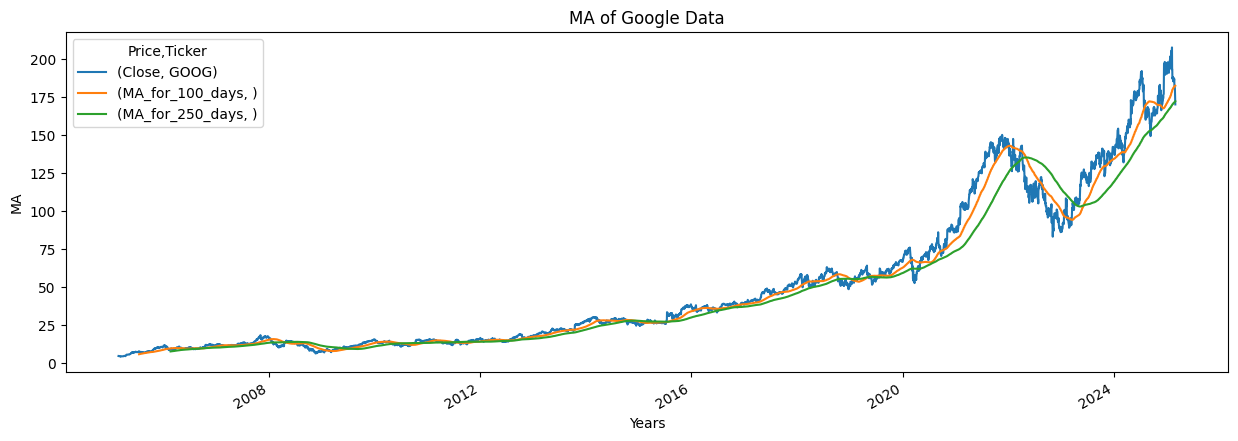

In [72]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']],'MA')

In [73]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-02-28,4.665436,NaN
2005-03-01,4.617538,-0.010267
2005-03-02,4.595699,-0.004730
2005-03-03,4.641115,0.009882
2005-03-04,4.613568,-0.005935


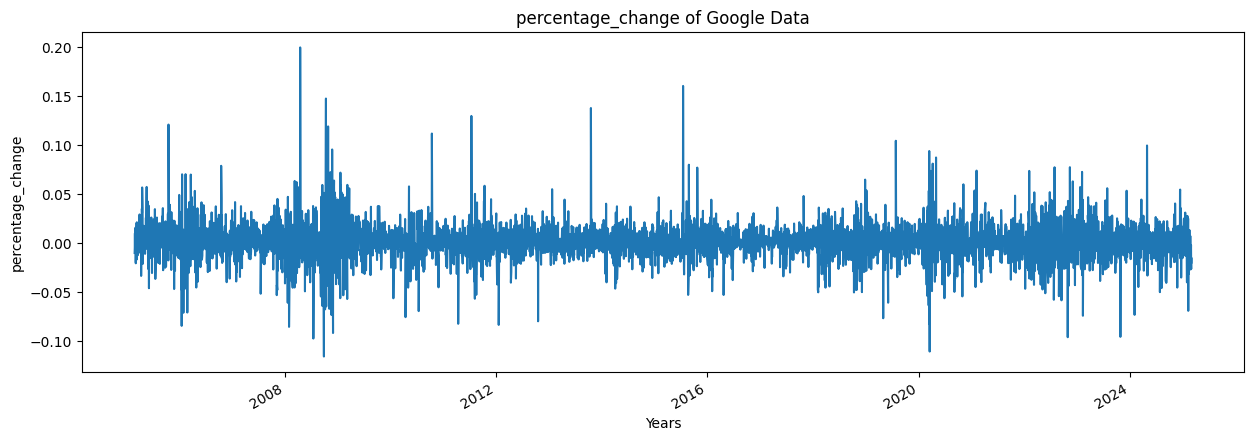

In [74]:
plot_graph((15,5),google_data['percentage_change_cp'], 'percentage_change')

In [75]:
close_price = google_data[['Close']]
max(close_price.values),min(close_price.values)

(array([207.71000671]), array([4.34281015]))

In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.00158642],
       [0.0013509 ],
       [0.00124351],
       ...,
       [0.85081167],
       [0.83768272],
       [0.81560448]])

In [77]:
len(scaled_data)

5033

In [78]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data,y_data = np.array(x_data),np.array(y_data)

In [79]:
x_data[0],y_data[0]

(array([[1.58642160e-03],
        [1.35089780e-03],
        [1.24351007e-03],
        [1.46682731e-03],
        [1.33137574e-03],
        [1.68648915e-03],
        [1.24594857e-03],
        [7.76124897e-04],
        [6.08942364e-04],
        [3.42909190e-04],
        [0.00000000e+00],
        [4.41757487e-04],
        [7.44398623e-05],
        [5.24736784e-04],
        [6.16260205e-04],
        [7.18770939e-04],
        [4.40535893e-04],
        [4.86907228e-04],
        [5.19857442e-04],
        [7.84664332e-04],
        [5.58906247e-04],
        [6.66296323e-04],
        [6.73616508e-04],
        [6.16260205e-04],
        [1.25693588e-03],
        [1.65720372e-03],
        [1.73652292e-03],
        [2.29054983e-03],
        [2.08187530e-03],
        [2.22587568e-03],
        [2.31496060e-03],
        [2.18926772e-03],
        [2.00865703e-03],
        [1.22154248e-03],
        [1.46195031e-03],
        [2.00255610e-03],
        [2.82017533e-03],
        [3.56701714e-03],
        [4.9

In [80]:
int(len(x_data)*0.7)

3453

In [81]:
5033-100-int(len(x_data)*0.7)

1480

In [82]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [83]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3453, 100, 1)
(1480, 100, 1)
(3453, 1)
(1480, 1)


In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp310-abi3-win_amd64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp312-cp312-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.70.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl

In [57]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB ? eta -:--:--
   ---------------- ----------------------- 0.5/1.3 MB 399.6 kB/s eta 0:00:02
   ---------------- ----------------------- 0.5/1.3 MB 399.6 kB/s eta 0:00:02
   ---------------- ----------------------- 0.5/1.3 MB 399.6 kB/s eta 0:00:02
   ---------------- ----------------------- 0.5/1.3 MB 399.6 kB/s eta 0:00:02
 

In [84]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [85]:
model = Sequential()
model.add (LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\panka\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [86]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [87]:
model.fit(x_train,y_train,batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 75s 21ms/step - loss: 2.9736e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - loss: 6.6242e-05


In [88]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [89]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


In [90]:
predictions

array([[0.27296197],
       [0.2726948 ],
       [0.27305752],
       ...,
       [0.8153787 ],
       [0.80378383],
       [0.79232943]], dtype=float32)

In [91]:
inv_predictions = scaler.inverse_transform(predictions)

In [92]:
inv_predictions

array([[ 59.85432 ],
       [ 59.799988],
       [ 59.873753],
       ...,
       [170.16411 ],
       [167.80608 ],
       [165.47664 ]], dtype=float32)

In [93]:
y_test

array([[0.2731512 ],
       [0.27375382],
       [0.27699984],
       ...,
       [0.85081167],
       [0.83768272],
       [0.81560448]])

In [94]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 59.89280319],
       [ 60.01535797],
       [ 60.67549133],
       ...,
       [177.36999512],
       [174.69999695],
       [170.21000671]])

In [95]:
rmse = np.sqrt(np.mean((inv_predictions - inv_y_test)**2))

In [96]:
rmse

6.096445481992822

In [97]:
ploting_data = pd.DataFrame(
    {
        'original_test_data':inv_y_test.reshape(-1),
        'predictions':inv_predictions.reshape(-1)
    },
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-04-10,59.892803,59.854321
2019-04-11,60.015358,59.799988
2019-04-12,60.675491,59.873753
2019-04-15,60.836411,60.233849
2019-04-16,61.136826,60.558838


<Figure size 640x480 with 0 Axes>

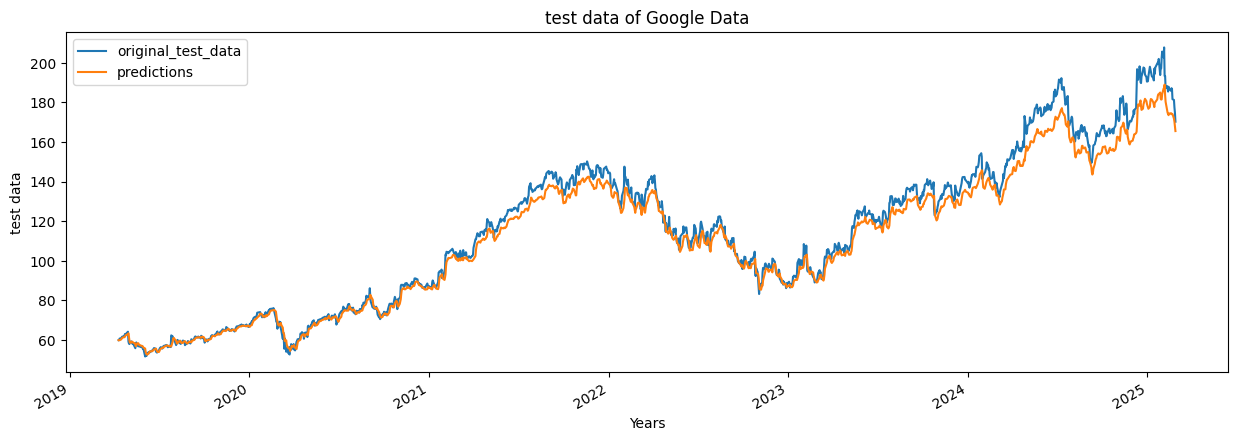

In [98]:
plot_graph((15,5),ploting_data,'test data')

<Figure size 640x480 with 0 Axes>

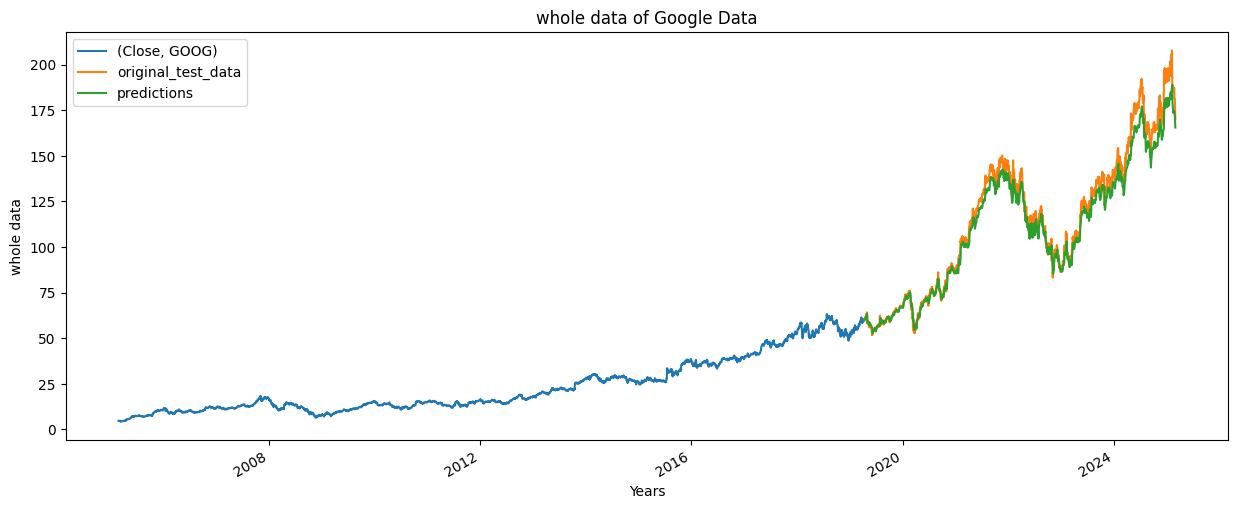

In [99]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data],axis = 0),'whole data')

In [100]:
model.save('Latest_stock_price_model.keras')